<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/13_workshop_mnist_multiperceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
#load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


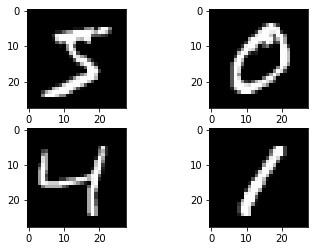

In [3]:
#plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

**Normalizar los pixeles**
- reshape en las dimensiones (El problema se abordara con una red full conect)
- Tiparlos a float
- Dividirlos por 255, ya que las imagenes son escalas de grises 

In [5]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2])).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2])).astype('float32') / 255

Es un problema de clasificación, necesitamos convertir las etiquetas a una matriz binario

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
y_train.shape

(60000, 10)

In [8]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [9]:
# Define model
def baseline_model():
  #Create model
  model = Sequential()
  model.add(Dense(784, input_dim = 784, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  #compile model
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  return model

In [10]:
X_test.shape

(10000, 784)

In [11]:
model = baseline_model()
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size = 200, verbose = 2)

Epoch 1/10
300/300 - 4s - loss: 0.2728 - accuracy: 0.9232 - val_loss: 0.1388 - val_accuracy: 0.9594
Epoch 2/10
300/300 - 1s - loss: 0.1092 - accuracy: 0.9687 - val_loss: 0.0943 - val_accuracy: 0.9719
Epoch 3/10
300/300 - 1s - loss: 0.0708 - accuracy: 0.9795 - val_loss: 0.0770 - val_accuracy: 0.9764
Epoch 4/10
300/300 - 1s - loss: 0.0514 - accuracy: 0.9854 - val_loss: 0.0682 - val_accuracy: 0.9782
Epoch 5/10
300/300 - 1s - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.0668 - val_accuracy: 0.9789
Epoch 6/10
300/300 - 1s - loss: 0.0279 - accuracy: 0.9925 - val_loss: 0.0610 - val_accuracy: 0.9813
Epoch 7/10
300/300 - 1s - loss: 0.0211 - accuracy: 0.9943 - val_loss: 0.0583 - val_accuracy: 0.9827
Epoch 8/10
300/300 - 1s - loss: 0.0160 - accuracy: 0.9960 - val_loss: 0.0636 - val_accuracy: 0.9803
Epoch 9/10
300/300 - 1s - loss: 0.0118 - accuracy: 0.9974 - val_loss: 0.0627 - val_accuracy: 0.9807
Epoch 10/10
300/300 - 1s - loss: 0.0087 - accuracy: 0.9984 - val_loss: 0.0598 - val_accuracy: 0.9813

In [12]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Error del modelo de linea base: %.2f%%" % (100-score[1]*100))

Error del modelo de linea base: 1.87%


In [13]:
print('Accuracy :',score[1])
print('Loss :',score[0])

Accuracy : 0.9812999963760376
Loss : 0.059761229902505875
